In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv('archive/DailyDelhiClimateTrain.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], format= '%Y-%m-%d')

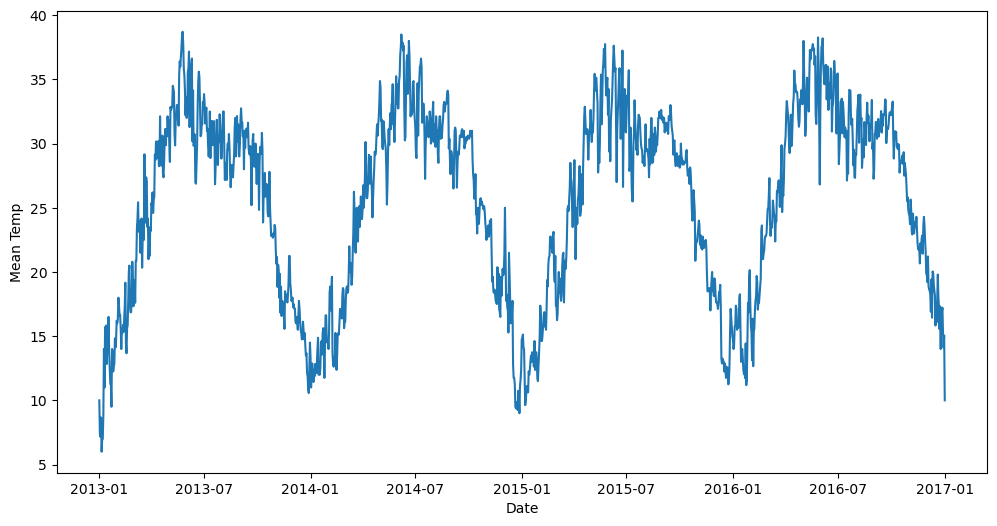

In [4]:
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.plot(df['date'].values, df['meantemp'].values)
plt.show()

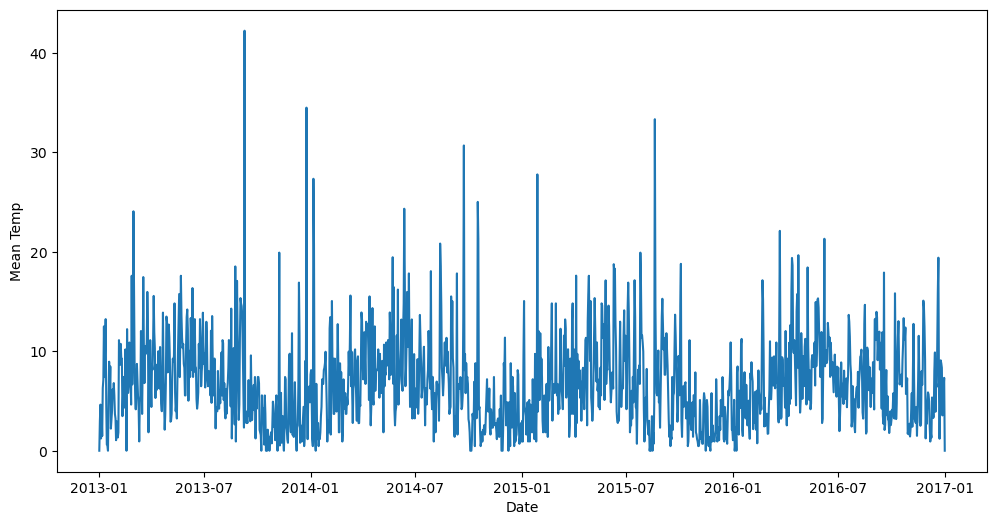

In [5]:
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.plot(df['date'].values, df['wind_speed'].values)
plt.show()

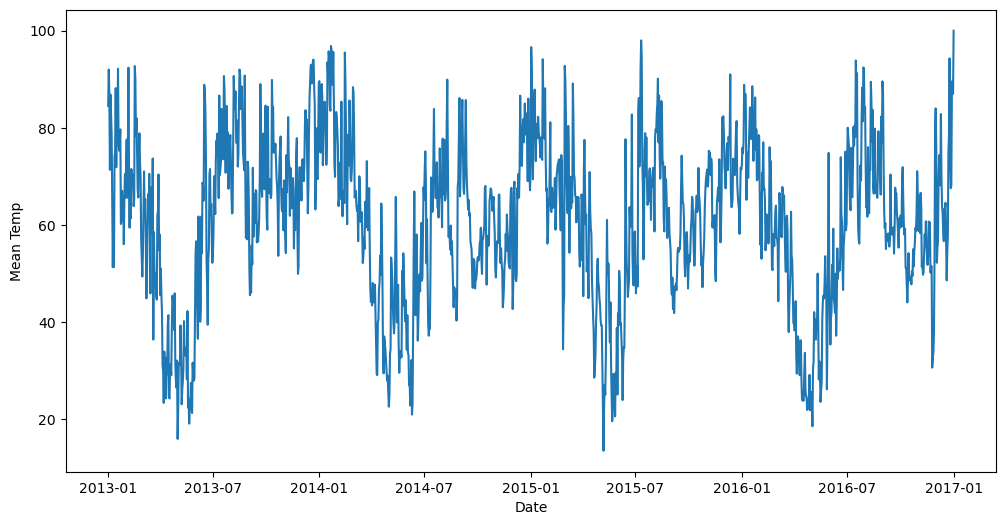

In [6]:
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.plot(df['date'].values, df['humidity'].values)
plt.show()

In [7]:
df = df.rename(columns={"date": "ds",
                       "meantemp": "y"})

In [8]:
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

21:37:53 - cmdstanpy - INFO - Chain [1] start processing
21:37:53 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
print(predictions)

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-01-01  24.689997    9.083790   14.279025    24.689997    24.689997   
1    2013-01-02  24.690142    9.174396   14.451910    24.690142    24.690142   
2    2013-01-03  24.690287    9.262699   14.468971    24.690287    24.690287   
3    2013-01-04  24.690432    9.445172   14.656479    24.690432    24.690432   
4    2013-01-05  24.690577    9.333868   14.442484    24.690577    24.690577   
...         ...        ...         ...         ...          ...          ...   
1822 2017-12-28  28.583674   12.897489   18.388531    27.999769    29.175885   
1823 2017-12-29  28.586590   12.955873   18.392534    27.998492    29.180902   
1824 2017-12-30  28.589506   12.752157   18.296331    27.998174    29.184784   
1825 2017-12-31  28.592422   12.806253   18.219518    27.998687    29.188666   
1826 2018-01-01  28.595337   12.903057   18.160062    27.999293    29.192549   

      additive_terms  additive_terms_lo

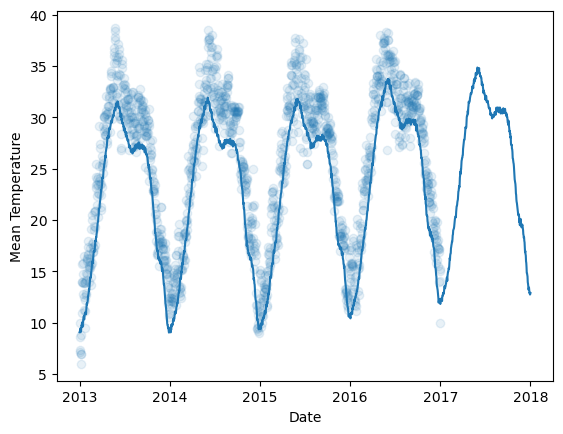

In [12]:
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.plot(predictions['ds'].values, predictions['yhat_lower'].values)
plt.scatter(df['ds'].values, df['y'].values, alpha=0.1)
plt.show()